In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# 為了顯示的漂亮, 我刻意的把印出來的 row 只顯示 15 個和 column 只顯示十個
# 大家練習的時候可以去掉下面兩行
pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', 10)
# 使用 scikit-learn 提供的鳶尾花資料庫
iris = load_iris()
df = pd.DataFrame(iris['data'], columns = iris['feature_names'])
df["target"] = iris["target"]
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
...,...,...,...,...,...
143,6.8,3.2,5.9,2.3,2
144,6.7,3.3,5.7,2.5,2


In [2]:
# 我們把我們擁有的資料集分成兩份, 一份測試, 一份訓練
from sklearn.model_selection import train_test_split
# 把資料分成兩部分 (1. 訓練資料 2. 測試資料)
data_train, data_test, target_train, target_test = train_test_split(iris['data'],
                                                                    iris['target'],
                                                                    test_size=0.1)

In [3]:
from sklearn.cluster import KMeans
# 我事先已經有三類了, 只是別人沒有幫我標註
# 所以這裡要注意！！我完全沒有帶入 target 喔
clu = KMeans(n_clusters = 3)
clu.fit(data_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [4]:
# 我們大概可以看到資料已經被分成三類了
clu.labels_

array([1, 1, 0, 1, 0, 2, 2, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 2, 0, 1, 0,
       0, 1, 2, 0, 0, 0, 1, 2, 2, 2, 0, 2, 1, 1, 0, 1, 0, 1, 1, 1, 2, 0,
       0, 1, 0, 2, 2, 2, 2, 1, 1, 0, 2, 2, 2, 0, 0, 2, 0, 0, 1, 0, 1, 1,
       2, 0, 1, 1, 1, 2, 2, 1, 1, 1, 0, 0, 2, 2, 0, 2, 1, 1, 2, 0, 2, 2,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 2, 2, 1, 0, 1, 1, 0, 2, 0, 1, 1, 1, 2,
       1, 0, 1, 0, 1, 1, 1, 0, 2, 1, 0, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1,
       2, 0, 0])

In [5]:
from sklearn.metrics import accuracy_score
predict = clu.predict(data_test)
print("預測標籤:", predict)
print("正確標籤:", target_test)

預測標籤: [0 0 1 0 1 0 1 1 1 1 1 2 1 0 1]
正確標籤: [0 0 1 0 1 0 1 1 1 1 1 2 1 0 1]


分數: [0.681046169211746, 0.5528190123564091, 0.4980505049972867, 0.4887488870931048, 0.3678464984712235, 0.3566882476581684]
K 值: [2, 3, 4, 5, 6, 7]


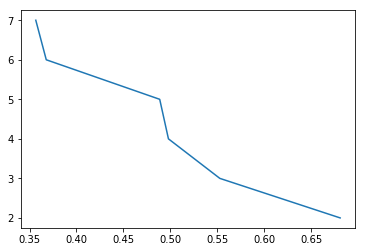

In [7]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
%matplotlib inline
scores = []
ks = []
for i in range(2, 8):
    clu = KMeans(n_clusters = i)
    clu.fit(iris['data'])
    clu_score = silhouette_score(iris['data'], clu.labels_)
    scores.append(clu_score)
    ks.append(i)

print("分數:", scores)
print("K 值:", ks)
plt.plot(scores, ks)